In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
titanic = pd.read_csv("/home/yash/Downloads/tested.csv")
tips = pd.read_csv("/home/yash/Downloads/tips.csv")
flights = pd.read_csv("/home/yash/Downloads/flight.csv")
iris = pd.read_csv("/home/yash/Downloads/iris.csv")

## 1. Scatter Plot ( Numerical - Numerical )

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Axes: xlabel='total_bill', ylabel='tip'>

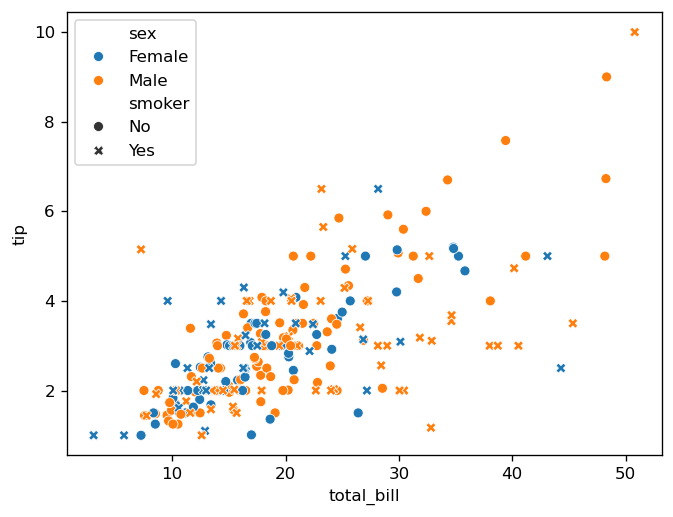

In [4]:
plt.figure(dpi = 120)
sns.scatterplot(x = tips["total_bill"],y = tips["tip"],hue = tips["sex"],style = tips["smoker"]) 
# we can use size for tips["size"] 

## 2. Bar Plot ( Numerical - Categorical )

In [5]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


<Axes: xlabel='Pclass', ylabel='Age'>

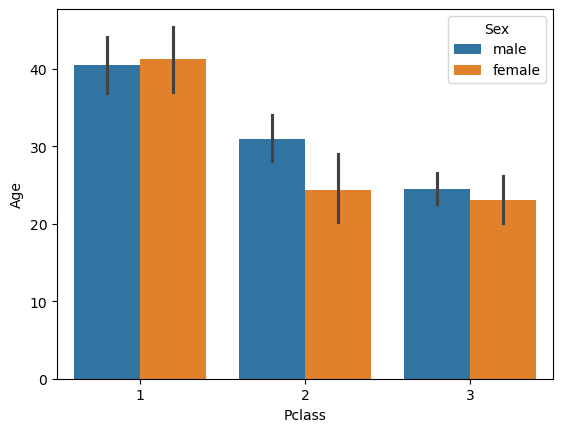

In [6]:
sns.barplot(x = titanic["Pclass"] , y = titanic["Age"], hue = titanic["Sex"])

## 3. Box Plot ( Numerical - Categorical )

<Axes: xlabel='Sex', ylabel='Age'>

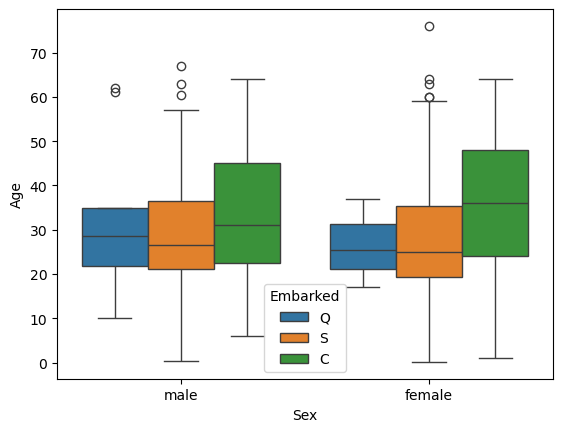

In [7]:
sns.boxplot(x = titanic["Sex"],y = titanic["Age"],hue = titanic["Embarked"])

## 4. HistPlot ( Numerical - Categorical )

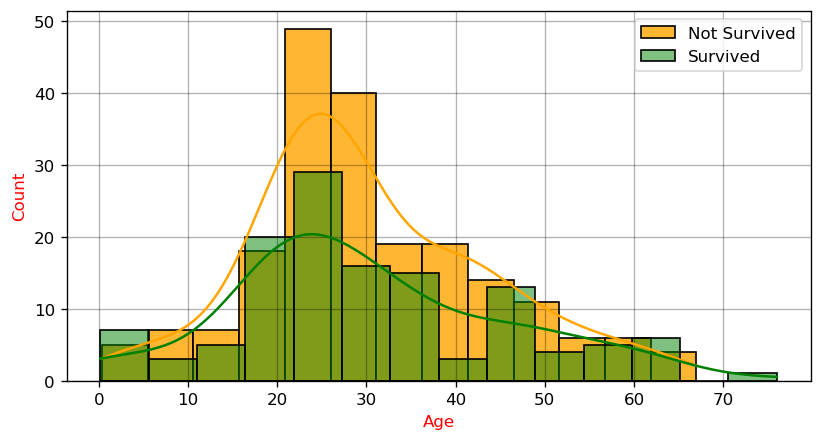

In [8]:
plt.figure(dpi = 120,figsize=(8,4))
sns.histplot(titanic[titanic["Survived"] == 0]["Age"],kde = True, label = "Not Survived",alpha = 0.8, color = "Orange",bins = 13)
sns.histplot(titanic[titanic["Survived"] == 1]["Age"],kde = True, label = "Survived",alpha = 0.5, color = "Green",bins = 14)
plt.xlabel("Age",color = "Red")
plt.ylabel("Count",color = "Red")
plt.grid(alpha = 0.3, color = "Black")
plt.legend()

## 5. HeatMap ( Categorical - Categorical )

In [9]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [10]:
x = pd.crosstab(titanic["Pclass"],titanic["Survived"]) 
x

Survived,0,1
Pclass,,
1,57,50
2,63,30
3,146,72


<Axes: xlabel='Survived', ylabel='Pclass'>

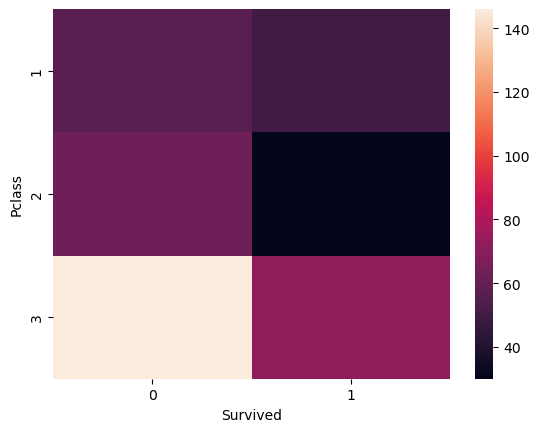

In [11]:
sns.heatmap(x)

In [12]:
y = titanic.groupby("Pclass").mean(numeric_only = True)["Survived"]*100
y

Pclass
1    46.728972
2    32.258065
3    33.027523
Name: Survived, dtype: float64

## 6. ClusterMap ( Categorical - Categorical )

In [13]:
z = pd.crosstab(titanic["Parch"],titanic["Survived"])
z

Survived,0,1
Parch,,
0,225,99
1,24,28
2,13,20
3,1,2
4,0,2
5,1,0
6,1,0
9,1,1


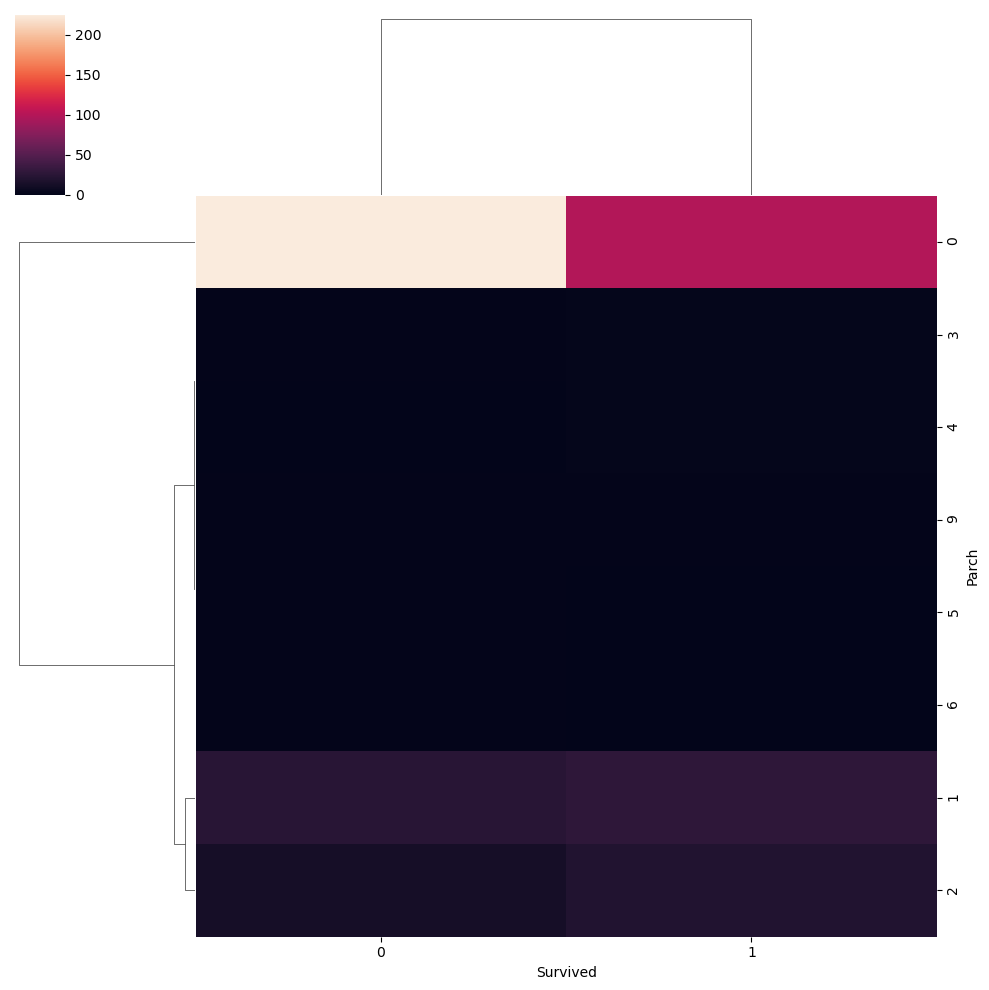

In [14]:
sns.clustermap(z)

## 7. Pair Plot

In [15]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<Figure size 6400x4800 with 0 Axes>

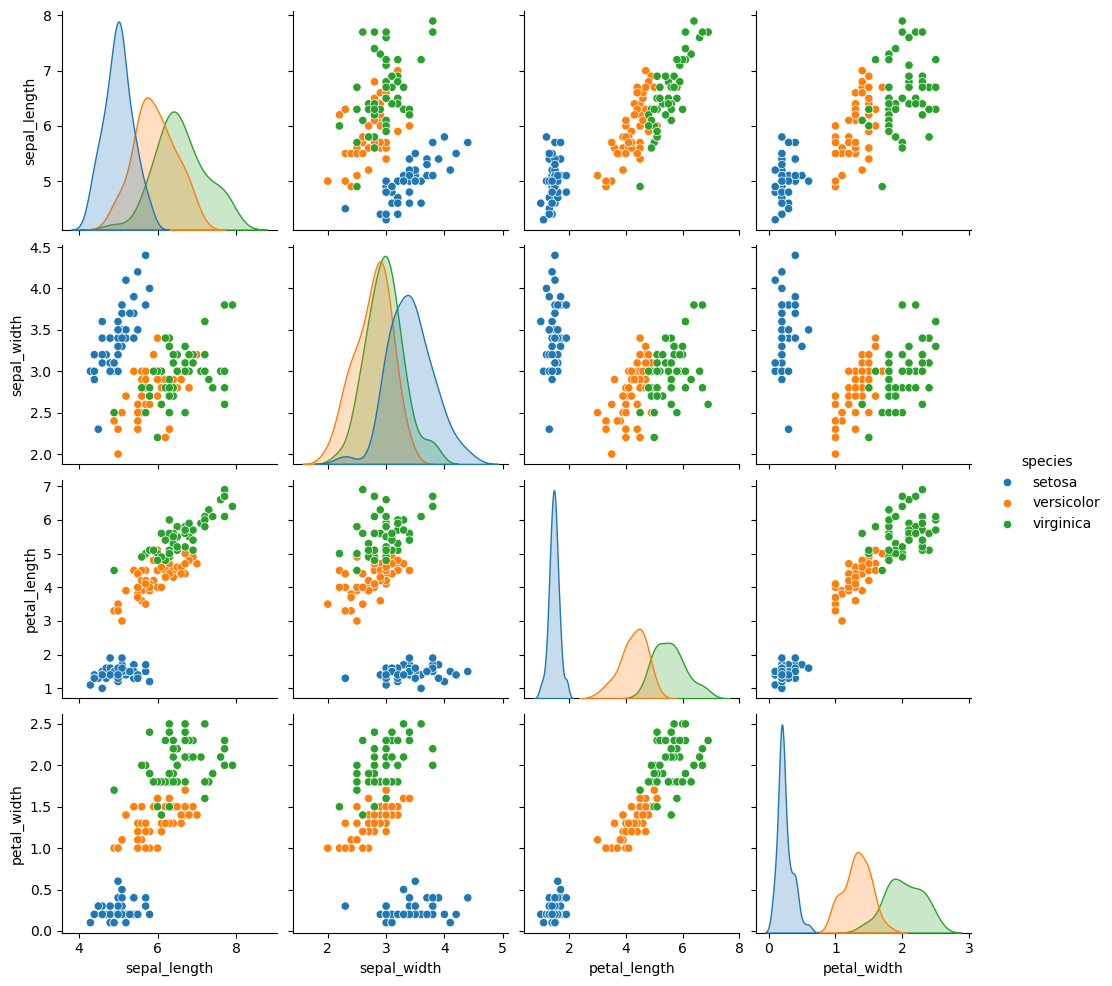

In [16]:
plt.figure(dpi = 1000)
sns.pairplot(iris,hue = "species")

## 8. Line Plot ( Numerical - Numerical )

In [17]:
flights.head()

,year,month,passengers
0,2010,January,243
1,2010,February,229
2,2010,March,112
3,2010,April,126
4,2010,May,231


In [18]:
a = flights.groupby("year").sum().reset_index()
a.head()

,year,month,passengers
0,2010,JanuaryFebruaryMarchAprilMayJuneJulyAugustSept...,2279
1,2011,JanuaryFebruaryMarchAprilMayJuneJulyAugustSept...,2406
2,2012,JanuaryFebruaryMarchAprilMayJuneJulyAugustSept...,2619
3,2013,JanuaryFebruaryMarchAprilMayJuneJulyAugustSept...,2379
4,2014,JanuaryFebruaryMarchAprilMayJuneJulyAugustSept...,2564


<Axes: xlabel='--- Year ---', ylabel='--- Passengers ---'>

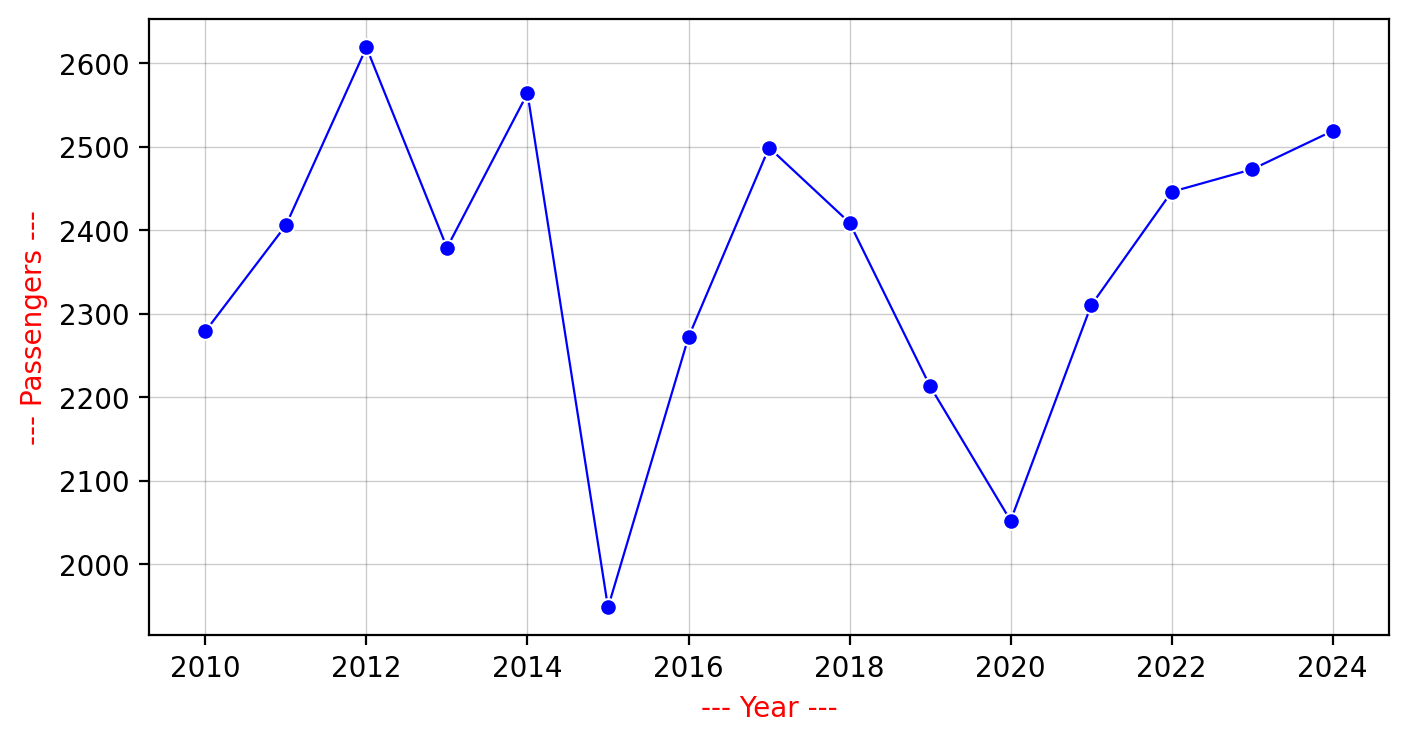

In [19]:
plt.figure(figsize = (8,4),dpi = 200)
plt.grid(alpha = 0.2,lw = 0.5,color = "Black")
plt.xlabel("--- Year ---",color = "Red")
plt.ylabel("--- Passengers ---",color = "Red")
sns.lineplot(x = a["year"],y = a["passengers"],marker ="o",color = "Blue",lw = 0.8) 
# it is like => plt.plot( a["year"], a["passengers"])

In [20]:
b = flights.pivot_table(values = "passengers",index = "month",columns = "year")
b

year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
month,,,,,,,,,,,,,,,
April,126.0,275.0,187.0,251.0,272.0,201.0,243.0,213.0,213.0,195.0,264.0,158.0,198.0,179.0,260.0
August,178.0,220.0,164.0,243.0,274.0,242.0,183.0,100.0,260.0,226.0,211.0,296.0,100.0,237.0,82.0
December,94.0,293.0,267.0,173.0,233.0,81.0,228.0,283.0,142.0,294.0,80.0,229.0,152.0,176.0,192.0
February,229.0,126.0,233.0,271.0,250.0,220.0,188.0,232.0,300.0,200.0,228.0,215.0,255.0,197.0,267.0
January,243.0,81.0,139.0,284.0,135.0,80.0,211.0,244.0,285.0,134.0,197.0,221.0,295.0,200.0,280.0
July,173.0,127.0,209.0,201.0,247.0,106.0,121.0,271.0,262.0,272.0,107.0,139.0,186.0,193.0,156.0
June,272.0,259.0,254.0,86.0,248.0,127.0,242.0,189.0,88.0,132.0,174.0,290.0,82.0,270.0,125.0
March,112.0,222.0,264.0,207.0,90.0,232.0,128.0,174.0,291.0,80.0,89.0,232.0,260.0,166.0,282.0
May,231.0,113.0,250.0,127.0,117.0,135.0,146.0,233.0,157.0,135.0,173.0,90.0,249.0,82.0,220.0


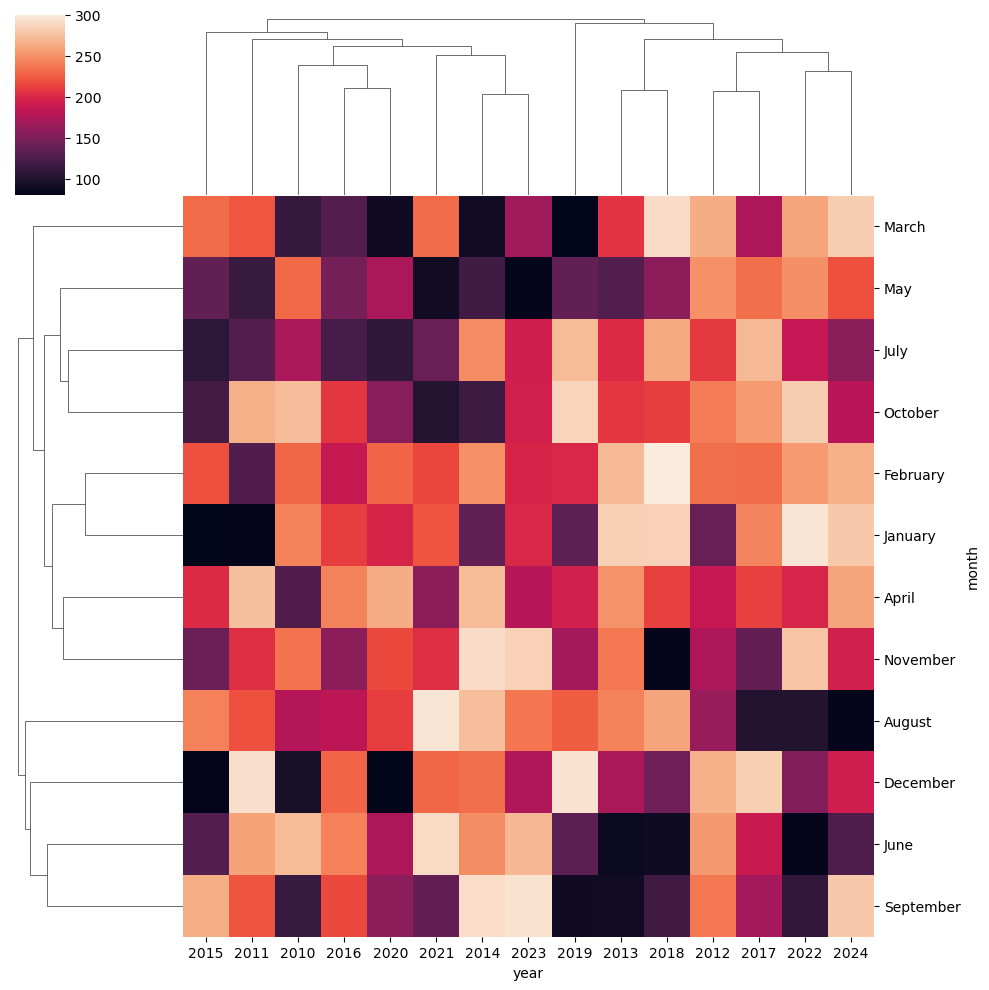

In [22]:
sns.clustermap(b)